# EDA for Loan data from lending club

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

#### Read from CSV file loan.csv.





In [3]:
loan_data = pd.read_csv('loan.csv', low_memory=False)

### Inspect the NA values in each columns.

In [4]:
loan_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<b>Drop columns that have 90% of values as NA</b>

In [5]:
for column in loan_data.columns:
    if loan_data[column].isna().sum() >= (loan_data.shape[0]*90/100):
        del loan_data[column]

In [6]:
tot_row, tot_col = loan_data.shape
print(tot_row, tot_col)

39717 55


NOTE: Columns are not reduced to 55 from 111 initially.

### Validate column Types are correct.

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Lets start with looking for the basic information about the lending club.

<b> What is the size of loans it offers. And its destribution.</b>

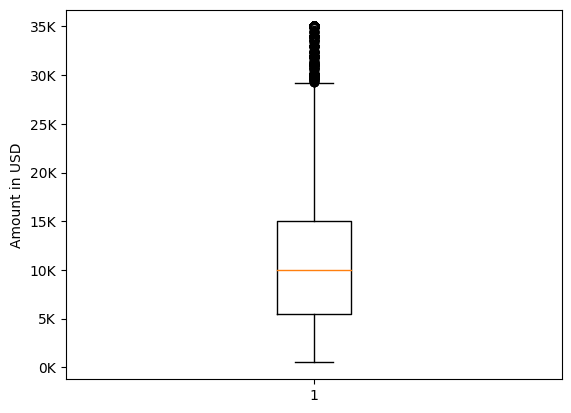

In [8]:
plt.boxplot(loan_data.loan_amnt)
plt.ylabel("Amount in USD")
ytick = np.arange(0, 40000, 5000)
plt.yticks(ytick , [f"{i//1000}K" for i in ytick])
plt.show()

<b> Lending cluster offers loans from 500 to 35000. With IQR is between 5 to 15K. 


#### Lets check what interest rates range to they have.

In [9]:
loan_data.int_rate.dtype

dtype('O')

The collumn  has dtype as object lets investigate why.

In [10]:
loan_data.int_rate[0]

'10.65%'

% Character at the end. This need to  be removed to be able to convert it to INT / Float.

In [11]:
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x.rstrip('%')))

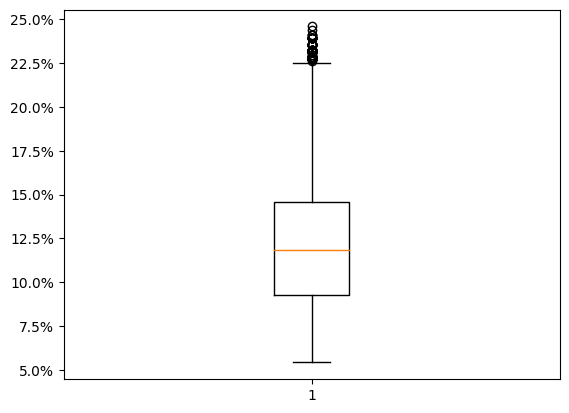

In [12]:
plt.boxplot(loan_data.int_rate)
ytick = np.arange(5, 27.5, 2.5)
plt.yticks(ytick , [f"{i}%" for i in ytick])
plt.show()

<b> The inrerest rates ranges from 5.4% to 24.6% with IQR between 9.25% to 14.59% 

### Which income group lending club caters to ?

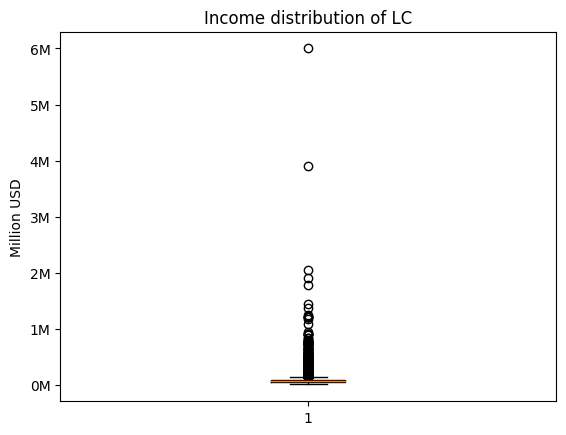

In [13]:
plt.boxplot(loan_data.annual_inc)
ytick = np.arange(0, 7000000, 1000000)
plt.yticks(ytick , [f"{i//1000000}M" for i in ytick])
plt.ylabel("Million USD")
plt.title("Income distribution of LC")
plt.show()

So many outliers on the box plot IQR not really visible correctly. Need to use describe function to get a better understanding of the IQR.

In [14]:
loan_data.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Annual Income IQR range is 40404 - 82300 with MIN - MAX is 4000 - 6000000 resp.

#### What is home ownership type of LC as a whole.

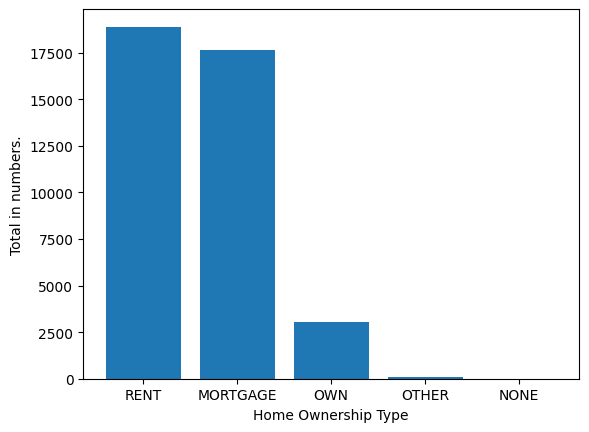

In [15]:
h_ownership = loan_data.home_ownership.value_counts().to_dict()
plt.bar(h_ownership.keys(), h_ownership.values())
plt.xlabel('Home Ownership Type')
plt.ylabel("Total in numbers.")
plt.show()

<b> Most of the LC are either on rented home or have mortgage.

## Lets check the distribution in the purpose of loan column.

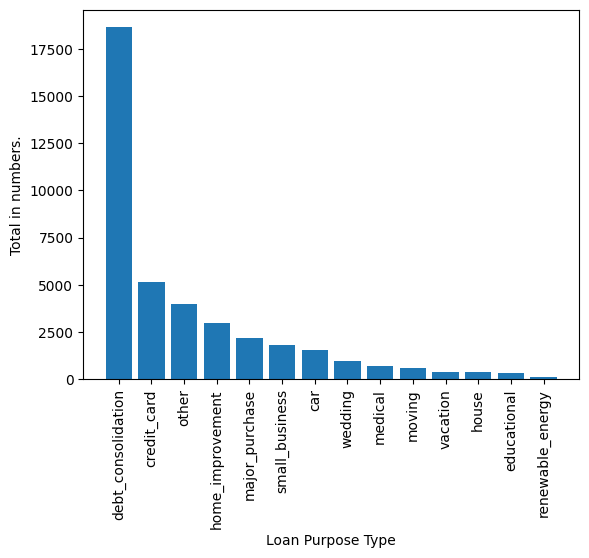

In [16]:
l_purpose = loan_data.purpose.value_counts().to_dict()
plt.bar(l_purpose.keys(), l_purpose.values())
plt.xlabel('Loan Purpose Type')
plt.ylabel("Total in numbers.")

plt.xticks(rotation = 90)

plt.show()

Most loan customers are taking loan to pay previous loans. This seems not a good sign for the company or economy as a whole.
This might indicate some trend in the ability to payback the loan.

## Analysis on the proportions of bad debt to the total loans.


In [17]:
bad_debt = loan_data[loan_data.loan_status == 'Charged Off']

In [18]:
round((bad_debt.shape[0]/tot_row ) * 100, 2)

14.17

Out of total LC 14.17% of accounts are bad debt for the company. <b>(by accounts)

In [19]:
round((bad_debt.funded_amnt.sum() / loan_data.funded_amnt.sum()) *100, 2)

15.21

Out of total LC 15.21% of accounts are bad debt for the company. <b>(by value)

## Comparing purpose with total loans and charged off loans.

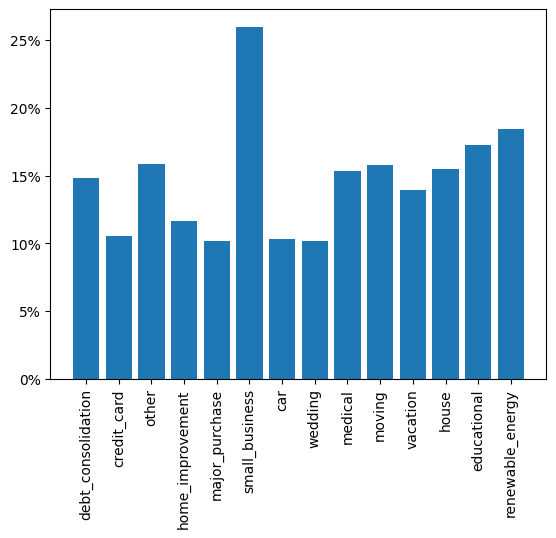

In [20]:
bd_purpose = bad_debt.purpose.value_counts().to_dict()
l_purpose = loan_data.purpose.value_counts().to_dict()
purpose_bad_pct = {}
for qw in l_purpose.keys():
    purpose_bad_pct[qw] = round((bd_purpose[qw] / l_purpose[qw]) * 100, 2)

plt.bar(purpose_bad_pct.keys(), purpose_bad_pct.values())
ytick = np.arange(0, 30, 5)
plt.yticks(ytick, [f"{i}%" for i in ytick])
plt.xticks( rotation = 90)
plt.show()

Looking at comparing purpose from total loans to bad debt loan. <br> 
Small business has higher rate of bad debt <b>(25%)</b>.<br>
Where as major purchases, car and wedding has lowest <b>(10%)</b>.

<b>Break up of grades on the bad debts cases.</b>

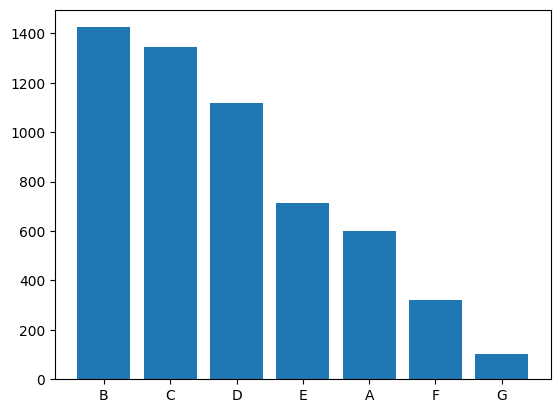

In [21]:
bd_grade = bad_debt.grade.value_counts().to_dict()
plt.bar(bd_grade.keys(), bd_grade.values())
plt.show()

<b>Comparasion of grades with total and bad debts</b>

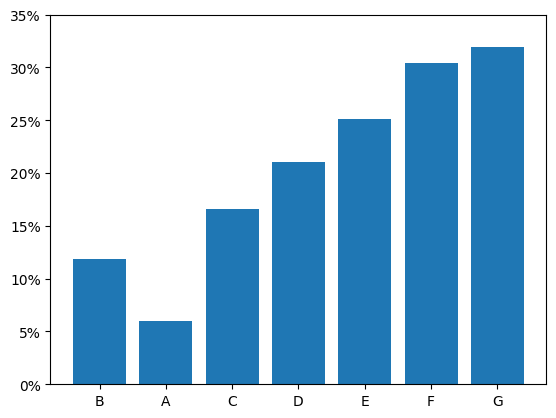

In [22]:
bd_purpose = bad_debt.grade.value_counts().to_dict()
l_purpose = loan_data.grade.value_counts().to_dict()
purpose_bad_pct = {}
for qw in l_purpose.keys():
    purpose_bad_pct[qw] = round((bd_purpose[qw] / l_purpose[qw]) * 100, 2)

plt.bar(purpose_bad_pct.keys(), purpose_bad_pct.values())
ytick = np.arange(0, 40, 5)
plt.yticks(ytick, [f"{i}%" for i in ytick])

plt.show()

Percentage of Grade G is the highest around 32% comparing with total and charged off LC.

<b>Percentage comparation of Grades and loan purpose as Small business.</b>

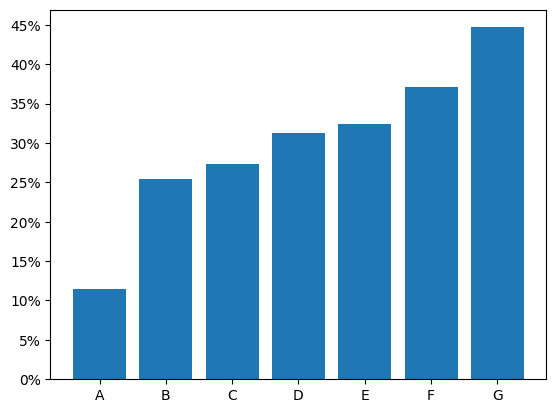

In [23]:
A_small_bus = bad_debt[(bad_debt.grade == 'A') & (bad_debt.purpose == 'small_business') ].shape[0]
B_small_bus = bad_debt[(bad_debt.grade == 'B') & (bad_debt.purpose == 'small_business') ].shape[0]
C_small_bus = bad_debt[(bad_debt.grade == 'C') & (bad_debt.purpose == 'small_business') ].shape[0]
D_small_bus = bad_debt[(bad_debt.grade == 'D') & (bad_debt.purpose == 'small_business') ].shape[0]
G_small_bus = bad_debt[(bad_debt.grade == 'G') & (bad_debt.purpose == 'small_business') ].shape[0]
F_small_bus = bad_debt[(bad_debt.grade == 'F') & (bad_debt.purpose == 'small_business') ].shape[0]
E_small_bus = bad_debt[(bad_debt.grade == 'E') & (bad_debt.purpose == 'small_business') ].shape[0]

Total_A_Small_bus = loan_data[(loan_data.grade == 'A') & (loan_data.purpose == 'small_business') ].shape[0]
Total_B_Small_bus = loan_data[(loan_data.grade == 'B') & (loan_data.purpose == 'small_business') ].shape[0]
Total_C_Small_bus = loan_data[(loan_data.grade == 'C') & (loan_data.purpose == 'small_business') ].shape[0]
Total_D_Small_bus = loan_data[(loan_data.grade == 'D') & (loan_data.purpose == 'small_business') ].shape[0]
Total_G_Small_bus = loan_data[(loan_data.grade == 'G') & (loan_data.purpose == 'small_business') ].shape[0]
Total_F_Small_bus = loan_data[(loan_data.grade == 'F') & (loan_data.purpose == 'small_business') ].shape[0]
Total_E_Small_bus = loan_data[(loan_data.grade == 'E') & (loan_data.purpose == 'small_business') ].shape[0]


pct_A_small_bu = A_small_bus / Total_A_Small_bus * 100
pct_B_small_bu = B_small_bus / Total_B_Small_bus * 100
pct_C_small_bu = C_small_bus / Total_C_Small_bus * 100
pct_D_small_bu = D_small_bus / Total_D_Small_bus * 100
pct_G_small_bu = G_small_bus / Total_G_Small_bus * 100
pct_F_small_bu = F_small_bus / Total_F_Small_bus * 100
pct_E_small_bu = E_small_bus / Total_E_Small_bus * 100

plt.bar(['A', 'B', 'C', 'D','E', 'F', 'G'], [pct_A_small_bu, pct_B_small_bu,pct_C_small_bu,pct_D_small_bu,pct_E_small_bu, pct_F_small_bu, pct_G_small_bu])
ytick = np.arange(0, 50, 5)
plt.yticks(ytick, [f"{i}%" for i in ytick])

plt.show()

<b>Percentage comparation of Grades and loan purpose as Debt consolidation.</b>

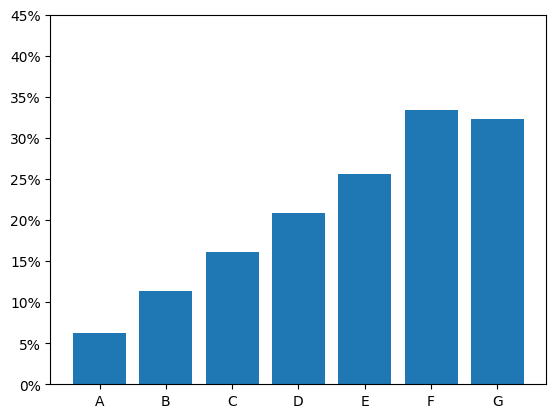

In [24]:
A_small_bus = bad_debt[(bad_debt.grade == 'A') & (bad_debt.purpose == 'debt_consolidation') ].shape[0]
B_small_bus = bad_debt[(bad_debt.grade == 'B') & (bad_debt.purpose == 'debt_consolidation') ].shape[0]
C_small_bus = bad_debt[(bad_debt.grade == 'C') & (bad_debt.purpose == 'debt_consolidation') ].shape[0]
D_small_bus = bad_debt[(bad_debt.grade == 'D') & (bad_debt.purpose == 'debt_consolidation') ].shape[0]
G_small_bus = bad_debt[(bad_debt.grade == 'G') & (bad_debt.purpose == 'debt_consolidation') ].shape[0]
F_small_bus = bad_debt[(bad_debt.grade == 'F') & (bad_debt.purpose == 'debt_consolidation') ].shape[0]
E_small_bus = bad_debt[(bad_debt.grade == 'E') & (bad_debt.purpose == 'debt_consolidation') ].shape[0]

Total_A_Small_bus = loan_data[(loan_data.grade == 'A') & (loan_data.purpose == 'debt_consolidation') ].shape[0]
Total_B_Small_bus = loan_data[(loan_data.grade == 'B') & (loan_data.purpose == 'debt_consolidation') ].shape[0]
Total_C_Small_bus = loan_data[(loan_data.grade == 'C') & (loan_data.purpose == 'debt_consolidation') ].shape[0]
Total_D_Small_bus = loan_data[(loan_data.grade == 'D') & (loan_data.purpose == 'debt_consolidation') ].shape[0]
Total_G_Small_bus = loan_data[(loan_data.grade == 'G') & (loan_data.purpose == 'debt_consolidation') ].shape[0]
Total_F_Small_bus = loan_data[(loan_data.grade == 'F') & (loan_data.purpose == 'debt_consolidation') ].shape[0]
Total_E_Small_bus = loan_data[(loan_data.grade == 'E') & (loan_data.purpose == 'debt_consolidation') ].shape[0]


pct_A_small_bu = A_small_bus / Total_A_Small_bus * 100
pct_B_small_bu = B_small_bus / Total_B_Small_bus * 100
pct_C_small_bu = C_small_bus / Total_C_Small_bus * 100
pct_D_small_bu = D_small_bus / Total_D_Small_bus * 100
pct_G_small_bu = G_small_bus / Total_G_Small_bus * 100
pct_F_small_bu = F_small_bus / Total_F_Small_bus * 100
pct_E_small_bu = E_small_bus / Total_E_Small_bus * 100

plt.bar(['A', 'B', 'C', 'D','E', 'F', 'G'], [pct_A_small_bu, pct_B_small_bu,pct_C_small_bu,pct_D_small_bu,pct_E_small_bu, pct_F_small_bu, pct_G_small_bu])
ytick = np.arange(0, 50, 5)
plt.yticks(ytick, [f"{i}%" for i in ytick])

plt.show()

<b>Grade G customers making purpose as small business, 45% of them were to be changed off </b>

# YOY analysis:

In [25]:
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format = '%b-%y')

In [26]:
loan_data['Year'] = loan_data.issue_d.dt.year

<b>LC growth YOY. (Number of accounts)

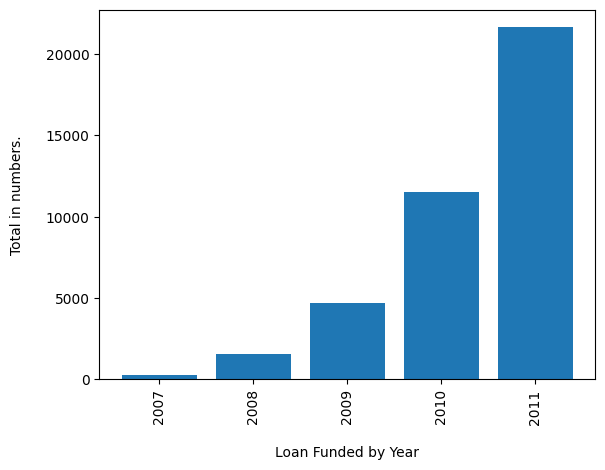

{2011: 21656, 2010: 11532, 2009: 4716, 2008: 1562, 2007: 251}


In [27]:
lc_by_year = loan_data.Year.value_counts().to_dict()
plt.bar(lc_by_year.keys(), lc_by_year.values())
plt.xlabel('\nLoan Funded by Year')
plt.ylabel("Total in numbers.\n")

plt.xticks(rotation = 90)

plt.show()
print(lc_by_year)

<b> Turnover YOY (USD)

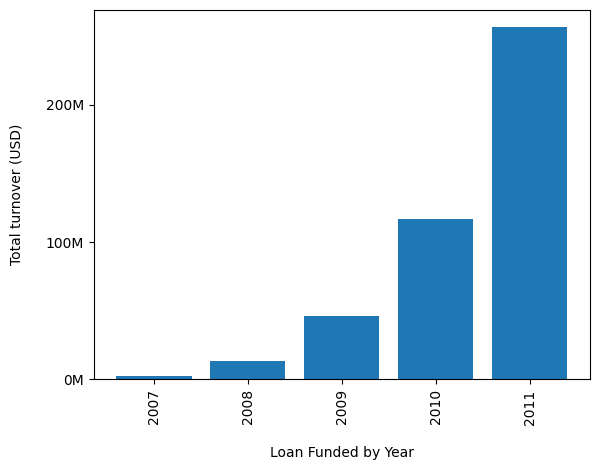

In [28]:
lc_by_year_value = loan_data.groupby('Year').funded_amnt.sum().to_dict()
plt.bar(lc_by_year_value.keys(), lc_by_year_value.values())
plt.xlabel('\nLoan Funded by Year')
plt.ylabel("Total turnover (USD)\n")
ytick = np.arange(0, 260000000, 100000000)
plt.yticks(ytick , [f"{i//1000000}M" for i in ytick])
plt.xticks(rotation = 90)

plt.show()